# **First Approch** 

    Note - Our first approch is to use caption that had - gender + graphical appearance + product name + deatil description of the product. Whoever this didn't gave us satisfactory results. Below is the code of the same. 

# Start of the code

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np # importing libraries 
import torch
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import matplotlib.pyplot as plt 
import os 

In [2]:
print(torch.cuda.is_available())

True


In [3]:
df = pd.read_csv('selected_articles.csv')
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender,caption
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid Black Vest top, Jersey top with n..."
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid White Vest top, Jersey top with n..."
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Stripe Off White Vest top, Jersey top w..."
3,111586001,Shape Up 30 den 1p Tights,Leggings,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,womens,"womens Solid Black Leggings, Tights with built..."
4,116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...,womens,"womens Solid Dark Blue Top, Fitted top in soft..."


In [4]:
df.columns

Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name', 'department_name',
       'index_name', 'index_group_name', 'section_name', 'garment_group_name',
       'detail_desc', 'gender', 'caption'],
      dtype='object')

# Loading Dataset and dropping incomplete rows

In [6]:
df = df.iloc[:,[0,-1]].copy()
df.head(4)

,article_id,caption
0,108775015,"womens Solid Black Vest top, Jersey top with n..."
1,108775044,"womens Solid White Vest top, Jersey top with n..."
2,108775051,"womens Stripe Off White Vest top, Jersey top w..."
3,111586001,"womens Solid Black Leggings, Tights with built..."


In [7]:
#dropping null values
print(df['caption'].isna().sum() )

df.dropna(inplace = True)
df.reset_index(drop = True,inplace = True)

print(df['caption'].isna().sum())

266
0


## Generating Word Length Column

In [8]:
df['cap_length'] = df['caption'].apply(lambda x: len(x.split(' ')))

**Droping those rows whose value is more than 55** 
    
    The clip model takes only 77 tokens and rest is truncated. So instead of passing half data to the model(captions with tokens greater than 77) we will drop those rows whose caption length is greater than 55. 
    
    So Roughly we'll lose around 2.5k images

In [9]:
print(len(df))
df = df.loc[df['cap_length']<55].reset_index(drop = True)
print(len(df))

55066
52744


In [10]:
df['article_id'] = df['article_id'].astype(str)
df['article_id']=["0"+x for x in df['article_id']]

In [11]:
os.getcwd()

'/home/kudupudi.n'

In [12]:
os.listdir(os.getcwd())

['.bash_history',
 '.bash_logout',
 '.bash_profile',
 '.bashrc',
 '.cache',
 '.conda',
 '.config',
 '.emacs',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kshrc',
 '.local',
 '.nv',
 'CLIP finetuning with example dataset.ipynb',
 'CLIP_Tuning.ipynb',
 'CLIP_finetuning_nikhil.ipynb',
 'images',
 'model_checkpoint',
 'ondemand',
 'selected_articles.csv']

In [13]:
df['article_id'] = df['article_id'].apply(lambda x : '/home/kudupudi.n/images/'+ x+'.jpg')
df.head()

,article_id,caption,cap_length
0,/home/kudupudi.n/images/0108775015.jpg,"womens Solid Black Vest top, Jersey top with n...",11
1,/home/kudupudi.n/images/0108775044.jpg,"womens Solid White Vest top, Jersey top with n...",11
2,/home/kudupudi.n/images/0108775051.jpg,"womens Stripe Off White Vest top, Jersey top w...",12
3,/home/kudupudi.n/images/0111586001.jpg,"womens Solid Black Leggings, Tights with built...",22
4,/home/kudupudi.n/images/0116379047.jpg,"womens Solid Dark Blue Top, Fitted top in soft...",18


In [14]:
df['article_id'][0]

'/home/kudupudi.n/images/0108775015.jpg'

In [15]:
df['t_f'] = df['article_id'].apply(lambda x: True if os.path.isfile(x) else False)
df

,article_id,caption,cap_length,t_f
0,/home/kudupudi.n/images/0108775015.jpg,"womens Solid Black Vest top, Jersey top with n...",11,True
1,/home/kudupudi.n/images/0108775044.jpg,"womens Solid White Vest top, Jersey top with n...",11,True
2,/home/kudupudi.n/images/0108775051.jpg,"womens Stripe Off White Vest top, Jersey top w...",12,True
3,/home/kudupudi.n/images/0111586001.jpg,"womens Solid Black Leggings, Tights with built...",22,True
4,/home/kudupudi.n/images/0116379047.jpg,"womens Solid Dark Blue Top, Fitted top in soft...",18,True
...,...,...,...,...
52739,/home/kudupudi.n/images/0952937003.jpg,"womens All over pattern Beige Dress, Fitted, c...",46,True
52740,/home/kudupudi.n/images/0952938001.jpg,"womens All over pattern Beige Top, Fitted top ...",23,True
52741,/home/kudupudi.n/images/0953763001.jpg,"womens Solid Black Vest top, Loose-fitting spo...",25,True
52742,/home/kudupudi.n/images/0956217002.jpg,"womens Solid Black Dress, Short, A-line dress ...",32,True


In [16]:
df['t_f'].value_counts()

t_f
True     52593
False      151
Name: count, dtype: int64

    Removing the rows with false values

In [17]:
keep_indx = list(df.loc[df['t_f'] == True].index)
df = df.iloc[keep_indx,:].reset_index(drop = True)
df.head()

,article_id,caption,cap_length,t_f
0,/home/kudupudi.n/images/0108775015.jpg,"womens Solid Black Vest top, Jersey top with n...",11,True
1,/home/kudupudi.n/images/0108775044.jpg,"womens Solid White Vest top, Jersey top with n...",11,True
2,/home/kudupudi.n/images/0108775051.jpg,"womens Stripe Off White Vest top, Jersey top w...",12,True
3,/home/kudupudi.n/images/0111586001.jpg,"womens Solid Black Leggings, Tights with built...",22,True
4,/home/kudupudi.n/images/0116379047.jpg,"womens Solid Dark Blue Top, Fitted top in soft...",18,True


# Converting data 
    converting the data to appropriate format for the pytorch and CLIP model

In [20]:
import os
from PIL import Image
import numpy as np
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [21]:
class image_title_dataset():
    def __init__(self, text_paths, list_image_path):
        self.text_paths = text_paths
        self.list_image_path = list_image_path

    def __len__(self):
        return len(self.text_paths)

    def __getitem__(self, idx):
        return self.list_image_path[idx], self.text_paths[idx]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train,val = train_test_split(df, test_size=0.1, random_state= 42)
train,test = train_test_split(train, test_size=0.2, random_state= 42)

train.reset_index(inplace= True,drop= True)
val.reset_index(inplace= True,drop= True)

test.reset_index(inplace= True,drop= True)

print('train')
print(len(train))
print('\n')
print('test')
print(len(test))
print('\n')
print('val')
print(len(val))

train
37866


test
9467


val
5260


In [23]:
## womens All over pattern Light Yellow Swimwear bottom, Fully lined bikini bottoms with a low waist and cutaway coverage at the back.

train['caption'][0] #  result shoould be same to above text 

'womens All over pattern Light Yellow Swimwear bottom, Fully lined bikini bottoms with a low waist and cutaway coverage at the back.'

In [25]:
## 'mens Solid Black Sweater, Jacket in soft fleece designed to be worn either as a jacket or as a thermal mid layer. 
## Stand-up collar, concealed zip down the front and side pockets. Unlined. Regular Fit. The polyester content of the jacket is partly recycled.'

test['caption'][0] #  result shoould be same to above text 

'mens Solid Black Sweater, Jacket in soft fleece designed to be worn either as a jacket or as a thermal mid layer. Stand-up collar, concealed zip down the front and side pockets. Unlined. Regular Fit. The polyester content of the jacket is partly recycled.'

In [24]:
## 'womens Melange Yellowish Brown Top, Calf-length dress in a knit containing some wool with a V-neck, gently dropped shoulders, 
## ribbing at the cuffs and hem, and slits in the sides.'

val['caption'][0] #  result shoould be same to above text 

'womens Melange Yellowish Brown Top, Calf-length dress in a knit containing some wool with a V-neck, gently dropped shoulders, ribbing at the cuffs and hem, and slits in the sides.'

In [26]:
train_dataloader = DataLoader(image_title_dataset(train['caption'], train['article_id']), batch_size = 32, shuffle= True)
test_dataloader = DataLoader( image_title_dataset(test['caption'], test['article_id']), batch_size= 32,shuffle= True)
val_dataloader = DataLoader( image_title_dataset(val['caption'], val['article_id']), batch_size= 32,shuffle= True)

# Training the model

In [19]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

NameError: name 'device' is not defined

In [29]:
def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 

In [23]:
# !pip install clip
# import clip 

In [ ]:
#defining optimizer and losses 
optimizer = torch.optim.Adam(model.parameters(), lr= 5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2)
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

# saving model parameters for further use
save_dir = 'model_checkpoint'
os.makedirs(save_dir, exist_ok=True)
checkpoint_path = os.path.join(save_dir, 'latest_model_checkpoint.pth')


num_epochs = 4
for epoch in range(num_epochs):
    pbar = tqdm(train_dataloader, total=len(train_dataloader))
    for batch in pbar:
        optimizer.zero_grad()

        imgs,texts = batch 
        # desired_size = (224, 224)
        images = [Image.open(img_path) for img_path in imgs]
        texts = list(texts)
    
        inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        
        # Forward pass
        outputs = model(**inputs)
        logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text
        
        # Compute loss
        ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
        
        # Backward pass
        total_loss.backward()
        if device == "cpu":
            optimizer.step()
        else : 
            convert_models_to_fp32(model)
            optimizer.step()

        
        pbar.set_description(f"Epoch {epoch}/{num_epochs}, Loss: {total_loss.item():.4f}")

    # Save (overwrite) the model and optimizer state at the end of each epoch
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': total_loss.item(),
    }, checkpoint_path)

    print(f"Checkpoint saved (overwritten) for epoch {epoch+1} at {checkpoint_path}")
    

    # Validation phase
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():  # No gradients needed for validation
        for batch in val_dataloader:
            images, texts = batch

            # desired_size = (224, 224)
            images = [Image.open(img_path) for img_path in images]
            texts = list(texts)
            
            inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            outputs = model(**inputs)
            logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text

            ground_truth = torch.arange(len(images), dtype=torch.long, device=device)
            val_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"Epoch {epoch}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")


Epoch 0/4, Loss: 0.4640: 100%|██████████| 1184/1184 [44:42<00:00,  2.27s/it]


Checkpoint saved (overwritten) for epoch 1 at model_checkpoint/latest_model_checkpoint.pth
Epoch 0/4, Validation Loss: 1.4503


Epoch 1/4, Loss: 0.5001: 100%|██████████| 1184/1184 [42:54<00:00,  2.17s/it]


Checkpoint saved (overwritten) for epoch 2 at model_checkpoint/latest_model_checkpoint.pth
Epoch 1/4, Validation Loss: 1.1566


Epoch 2/4, Loss: 0.3925: 100%|██████████| 1184/1184 [42:45<00:00,  2.17s/it]


Checkpoint saved (overwritten) for epoch 3 at model_checkpoint/latest_model_checkpoint.pth
Epoch 2/4, Validation Loss: 1.4471


Epoch 3/4, Loss: 1.0816:  86%|████████▌ | 1013/1184 [35:59<05:58,  2.10s/it]

# Restarting the training 

    training the model from where we left it off

In [29]:
from transformers import CLIPModel, CLIPProcessor, CLIPTokenizer

# Initialize model, optimizer, and other components
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

optimizer = torch.optim.Adam(model.parameters(), lr= 5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2)
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 

In [30]:
checkpoint = torch.load('model_checkpoint/latest_model_checkpoint.pth', map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Load other training components if necessary, e.g., epoch number
new_epoch = checkpoint.get('epoch', 0)

In [52]:
num_epochs = 4
for epoch in range(new_epoch, num_epochs):
    pbar = tqdm(train_dataloader, total=len(train_dataloader))
    for batch in pbar:
        optimizer.zero_grad()

        imgs,texts = batch 
        # desired_size = (224, 224)
        images = [Image.open(img_path) for img_path in imgs]
        texts = list(texts)
    
        inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        
        # Forward pass
        outputs = model(**inputs)
        logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text
        
        # Compute loss
        ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
        
        # Backward pass
        total_loss.backward()
        if device == "cpu":
            optimizer.step()
        else : 
            convert_models_to_fp32(model)
            optimizer.step()

        
        pbar.set_description(f"Epoch {epoch}/{num_epochs}, Loss: {total_loss.item():.4f}")

    # Save (overwrite) the model and optimizer state at the end of each epoch
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': total_loss.item(),
    }, 'model_checkpoint/latest_model_checkpoint.pth')

    print(f"Checkpoint saved (overwritten) for epoch {epoch+1} at {'model_checkpoint/latest_model_checkpoint.pth'}")
    

    # Validation phase
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():  # No gradients needed for validation
        for batch in val_dataloader:
            images, texts = batch

            # desired_size = (224, 224)
            images = [Image.open(img_path) for img_path in images]
            texts = list(texts)
            
            inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation= True, max_length = 77)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            outputs = model(**inputs)
            logits_per_image, logits_per_text = outputs.logits_per_image, outputs.logits_per_text

            ground_truth = torch.arange(len(images), dtype=torch.long, device=device)
            val_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"Epoch {epoch}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")

Epoch 3/4, Loss: 0.2532: 100%|██████████| 1184/1184 [49:01<00:00,  2.48s/it]


Checkpoint saved (overwritten) for epoch 4 at model_checkpoint/latest_model_checkpoint.pth
Epoch 3/4, Validation Loss: 1.0011


# Testing 

## Fine Tunned Model

In [29]:
from transformers import CLIPModel, CLIPProcessor, CLIPTokenizer

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the model architecture
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# Load the fine-tuned model parameters
model_file = torch.load('model_checkpoint/latest_model_checkpoint.pth', map_location=device)
model.load_state_dict(model_file['model_state_dict'])
model.to(device)  # Move model to the appropriate device (CPU or GPU)


# Load the processor and tokenizer
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")


In [30]:
def get_single_image_embedding(my_image):
    image = processor(
    		text = None,
    		images = my_image,
    		return_tensors="pt"
    		)["pixel_values"].to(device)
    
    embedding = model.get_image_features(image)
    embedding_as_np = embedding.cpu().detach().numpy() 
    return embedding_as_np


def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt") .to(device)
    text_embeddings = model.get_text_features(**inputs)

 	# convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np

In [32]:
test['img_embeddings'] = test['article_id'].apply(lambda x: get_single_image_embedding(Image.open(x)))

In [35]:
test.head()

,article_id,caption,cap_length,t_f,img_embeddings
0,/home/kudupudi.n/images/0795354001.jpg,"mens Solid Black Sweater, Jacket in soft fleec...",44,True,"[[0.0017019107, 0.0014239277, -0.00571223, -0...."
1,/home/kudupudi.n/images/0869329002.jpg,"Solid Black Outdoor Waistcoat, Slightly short...",49,True,"[[0.0012418239, 0.0008533694, -0.006150071, -0..."
2,/home/kudupudi.n/images/0841298005.jpg,"womens Solid Greenish Khaki Blouse, Sleeveless...",26,True,"[[0.000770418, 0.002253888, -0.0040720915, -0...."
3,/home/kudupudi.n/images/0832323001.jpg,"womens Glittering/Metallic Black Dress, Short,...",27,True,"[[0.0015701005, 0.0016246964, -0.006629352, -0..."
4,/home/kudupudi.n/images/0765433002.jpg,"womens All over pattern Grey Leggings, Sports ...",33,True,"[[0.0009182672, 0.0008736912, -0.004145367, -0..."


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
def get_top_N_images(query, data, top_K=4):
    
    query_vect = get_single_text_embedding(query)
  
    # Relevant columns
    revevant_cols = ["caption", "article_id", "cos_sim"]
    # Run similarity Search
    data["cos_sim"] = data["img_embeddings"].apply(lambda x: cosine_similarity(query_vect, x))# line 17
    data["cos_sim"] = data["cos_sim"].apply(lambda x: x[0][0])
    """
    Retrieve top_K (4 is default value) articles similar to the query
    """
    most_similar_articles = data.sort_values(by='cos_sim',  ascending=False)[1:top_K+1] # line 24
    
    return most_similar_articles[revevant_cols].reset_index()

In [72]:
get_top_N_images('Mens Melange Blue T-shirt,',test)

,index,caption,article_id,cos_sim
0,8204,"Embroidery Light Blue T-shirt, Fitted jersey ...",/home/kudupudi.n/images/0738010003.jpg,0.646453
1,1301,"mens Stripe Dark Blue T-shirt, T-shirt in slub...",/home/kudupudi.n/images/0591466047.jpg,0.645036
2,1511,"Embroidery Light Blue T-shirt, T-shirt in sof...",/home/kudupudi.n/images/0640258017.jpg,0.643086
3,5747,"Embroidery Blue T-shirt, T-shirt in soft jersey.",/home/kudupudi.n/images/0717490083.jpg,0.641648


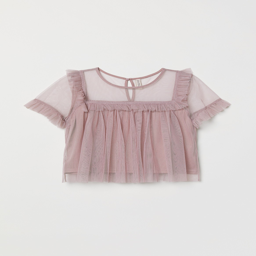

In [66]:
Image.open('/home/kudupudi.n/images/0669906001.jpg').resize((256,256))

## OG Tunned Model

In [74]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")


# Load the fine-tuned model parameters
model.to(device)  

# Load the processor and tokenizer
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

In [75]:
def get_single_image_embedding(my_image):
    image = processor(
    		text = None,
    		images = my_image,
    		return_tensors="pt"
    		)["pixel_values"].to(device)
    
    embedding = model.get_image_features(image)
    embedding_as_np = embedding.cpu().detach().numpy() 
    return embedding_as_np


def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt") .to(device)
    text_embeddings = model.get_text_features(**inputs)

 	# convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
def get_top_N_images(query, data, top_K=4):
    
    query_vect = get_single_text_embedding(query)
  
    # Relevant columns
    revevant_cols = ["caption", "article_id", "cos_sim"]
    # Run similarity Search
    data["cos_sim"] = data["img_embeddings"].apply(lambda x: cosine_similarity(query_vect, x))# line 17
    data["cos_sim"] = data["cos_sim"].apply(lambda x: x[0][0])
    """
    Retrieve top_K (4 is default value) articles similar to the query
    """
    most_similar_articles = data.sort_values(by='cos_sim',  ascending=False)[1:top_K+1] # line 24
    
    return most_similar_articles[revevant_cols].reset_index()

In [77]:
test['img_embeddings_ogclip'] = test['article_id'].apply(lambda x: get_single_image_embedding(Image.open(x)))

In [78]:
test.to_csv('test_data.csv')